<div style = 'text-align: center;'>
    <span style="font-family:cursive; font-size: 28px">Heart Failure Classification 💖</span>
</div>

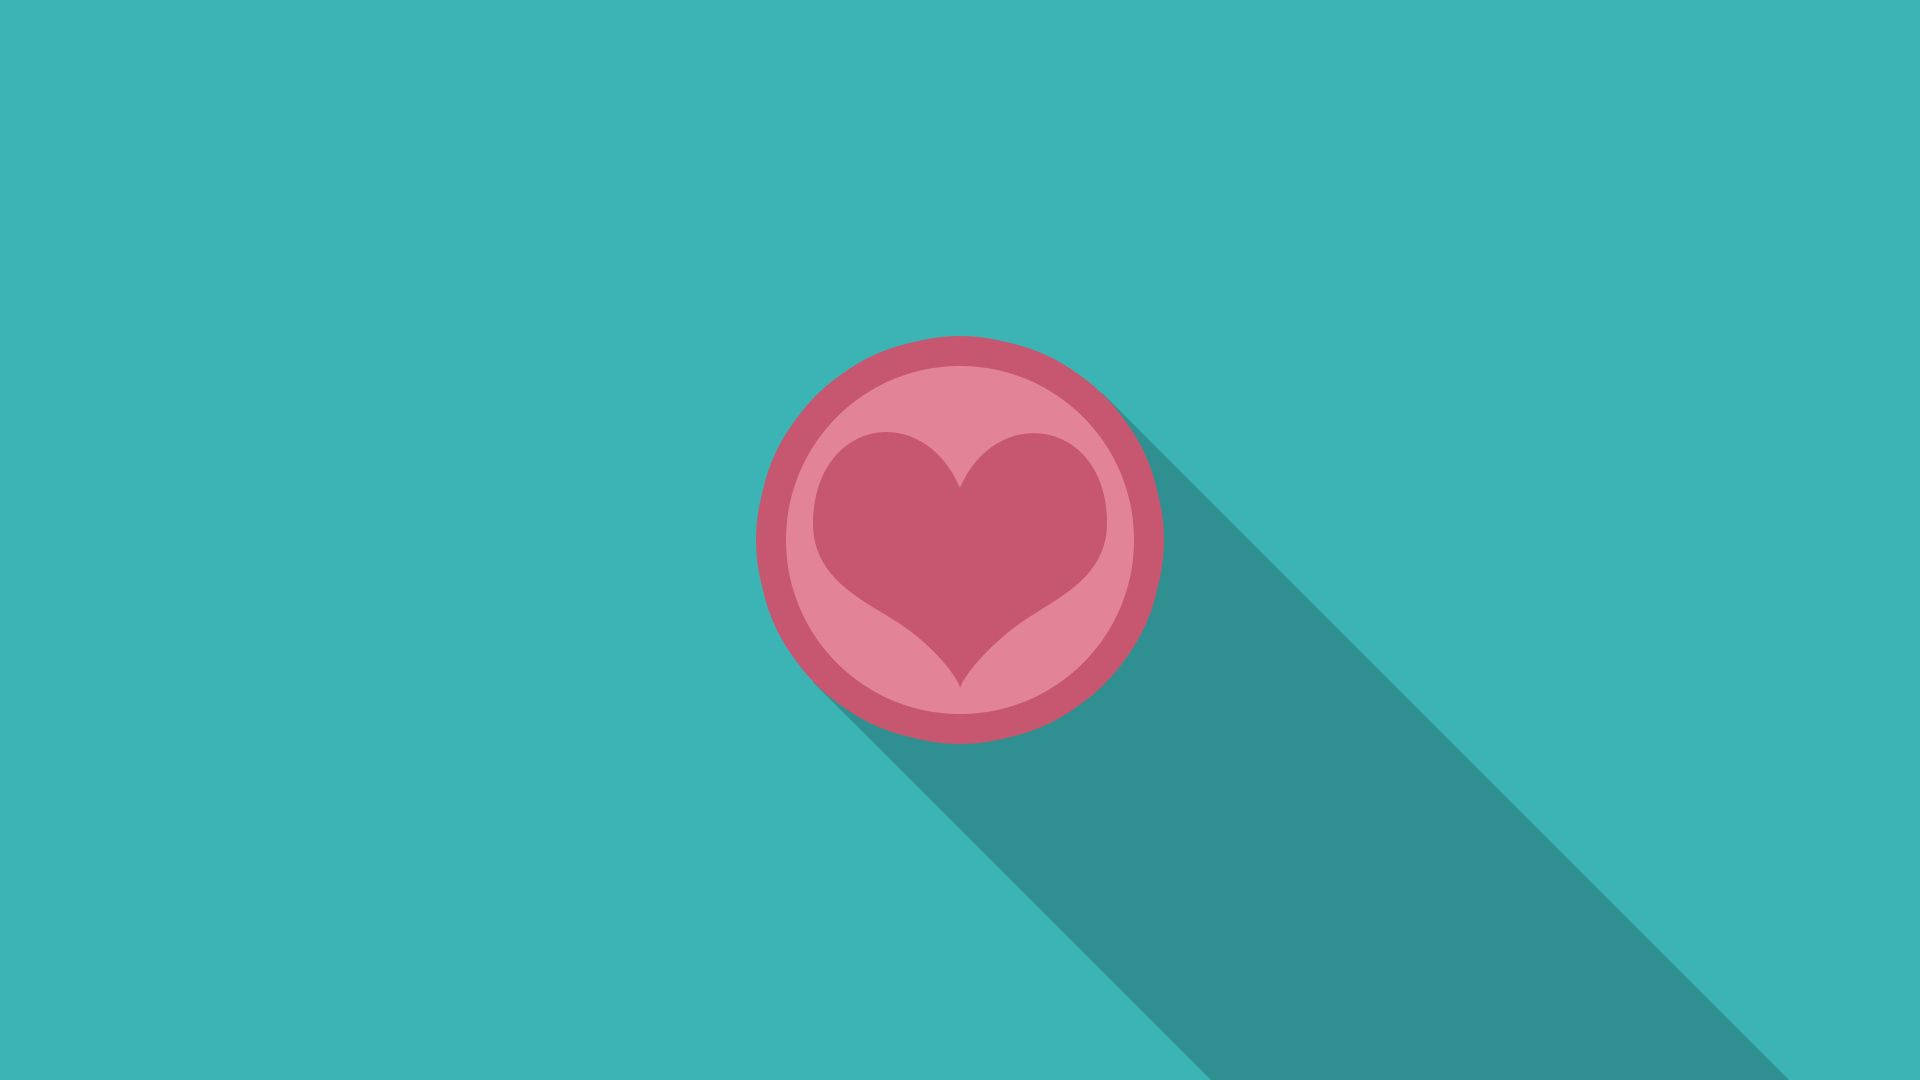

<div style = 'text-align: center;'>
    <span style="font-family:cursive; font-size: 24px">INTRODUCTION 👨‍⚕️</span>
</div>

<div style = 'text-align: left;'>
    <span style="font-family:cursive; font-size: 20px">💡 About the data 💡</span>
</div>

<div>
    <p style="font-family:cursive; font-size: 16px"> <br> <b>Age</b>: age of the patient [years] <br> <b>Sex</b>: sex of the patient [<b>M</b>: Male, <b>F</b>: Female] <br> <b>ChestPainType</b>: chest pain type [<b>TA</b>: Typical Angina, <b>ATA</b>: Atypical Angina, <b>NAP</b>: Non-Anginal Pain, <b>ASY</b>: Asymptomatic] <br> <b>RestingBP</b>: resting blood pressure [mm Hg] <br> <b>Cholesterol</b>: serum cholesterol [mm/dl] <br> <b>FastingBS</b>: fasting blood sugar [<b>1</b>: if FastingBS > 120 mg/dl, <b>0</b>: otherwise] <br> <b>RestingECG</b>: resting electrocardiogram results [Normal: Normal, <b>ST</b>: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), <b>LVH</b>: showing probable or definite left ventricular hypertrophy by Estes' criteria] <br> <b>MaxHR</b>: maximum heart rate achieved [Numeric value between 60 and 202] <br> <b>ExerciseAngina</b>: exercise-induced angina [<b>Y</b>: Yes, <b>N</b>: No] <br> <b>Oldpeak</b>: oldpeak = ST [Numeric value measured in depression] <br> <b>ST_Slope</b>: the slope of the peak exercise ST segment [<b>Up</b>: upsloping, <b>Flat</b>: flat, <b>Down</b>: downsloping] <br> <b>HeartDisease</b>: output class [<b>1</b>: heart disease, <b>0</b>: Normal] <br>
    </p>
</div>

<div style = 'text-align: center;'>
    <span style="font-family:cursive; font-size: 24px">Table of Contents 👨‍⚕️</span>
</div>

* [Data Analysis](#analysis)
    * [Getting to know our data](#data_info)
    * [Descriptive statistics of our dataset](#desc_stats)
    * [The Target Feature](#target)
    * [The Feature Types](#feature_types)
        * [Numerical Features](#num_features)
            * [Checking Outliers](#outliers)
            * [Yeojohnson Transformation](#yeo)
            * [Square root Transformation](#sqrt)
            * [Correlation](#corr)
        * [Categorical Features](#cat_features)
            * [Number of categories present in each categorical feature](#cat_num)
            * [Encoding categorical features](#cat_encode)
            * [Sex](#sex)
            * [ChestPainType](#chest_pain)
            * [RestingECG](#ecg)
            * [ST_Slope](#st)
            * [FastingBS](#fasting)
            * [ExerciseAngina](#angina)
            * [Rare Labels](#rare)
* [Transforming the dataset](#transforming)
    * [Train-test Split](#split)
    * [Numerical Features](#transform_numerical)
    * [Categorical Features](#transform_categorical)
* [Feature Scaling](#scaling)
* [Feature Selection](#feature_selection)
* [Model Building](#models)
    * [Decision Tree Classifier with hyperparameter tuning](#tree)
        * [Classification Report](#report)
        * [Confusion Matrix](#matrix)

In [1]:
!pip install feature-engine

import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split

from feature_engine.transformation import YeoJohnsonTransformer, PowerTransformer
from feature_engine.encoding import OneHotEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text

from sklearn.model_selection import GridSearchCV


from sklearn.metrics import classification_report, confusion_matrix
from yellowbrick.classifier import ROCAUC

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 1.3 MB/s eta 0:00:00a 0:00:01


In [2]:
dataset = pd.read_csv('../input/heart-failure-prediction/heart.csv')
print(dataset.shape)

dataset.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Analysis
<a id='analysis'>

# Getting to know our data
<a id='data_info'/>

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


> #### As we can see there are no null values in our dataset but the columns data type must be adjusted according to the data description.

> #### Fasting blood sugar must be object. [According to the data description: FastingBS value is 1: if FastingBS > 120 mg/dl (OR) 0: otherwise]

> #### Since the HeartDisease is our target class, we need to convert it to object.
> > #### Classification algorithms make sense when the output (independent) feature is a category rather than a discrete or continous values.

> #### Note: Inorder to save some memory, one way to do that is to, change the dtype of the feautres from int64 or float64 to int32 or float32 respectively.
> > #### Since this is a small dataset, we can just leave it as it is.

In [4]:
for feature in ['FastingBS', 'HeartDisease']:
    dataset[feature] = dataset[feature].astype('object')

# Descriptive statics of our dataset
<a id='desc_stats'/>

In [5]:
dataset.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


> #### describe() is used to get descriptive statistics of the dataset.

> #### One way of using this function before further analysis is, we can check the std of each numerical feature in our dataset.

> #### This helps to get a quick picture of the feature distribution. For example, if the std deviation is 0, we can confirm that all the values in that feature are same. So, we can get rid of that value.

> #### Higher the std value higher the variance, and lower the std values lower the variance.

# The Target Feature
<a id='target'/>

In [6]:
dataset['HeartDisease'] = dataset['HeartDisease'].map({1: 'Heart Disease', 0: 'Normal'})
bar_data = dataset['HeartDisease'].value_counts()

# Data to be viewed when we hover the plot
hover_temp_data = list(pd.Series(dataset['HeartDisease'].value_counts() / len(dataset) * 100).map(lambda x: round(x)).values)
hover_temp = "<b>Output class: </b> %{x} <br>"
hover_temp += "<b>Patients with %{x} Condition: </b> %{y} <br>"
hover_temp += "<b>Percentage of patients with %{x} Condition: %{customdata}%</b> "

data = [go.Bar(x = list(bar_data.index), y = list(bar_data.values), hovertemplate = hover_temp, name = 'Info', customdata = hover_temp_data)]
layout = go.Layout(width = 800, height = 600, template = "simple_white")

fig = go.Figure(data = data, layout = layout)

fig.data[0].marker.color = ('firebrick', 'steelblue')
fig.show()

> #### Lucky for us! Data is is not imbalanced

> #### About 55% of the data is about people who have heart disease (Class - 1) and remaining 45% of the data is about who didn't have heart disease (Class - 0)

# The Feature Types
<a id='feature_types'/>

In [7]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'object' and feature != 'id']
print("Total number of numerical features: ", len(numerical_features))

print(numerical_features)

Total number of numerical features:  5
['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [8]:
categorical_features = [feature for feature in dataset.columns if feature not in numerical_features and feature != 'HeartDisease']
print("Total number of categorical features: ", len(categorical_features))

print(categorical_features)

Total number of categorical features:  6
['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


## Numerical Features
<a id='num_features'/>

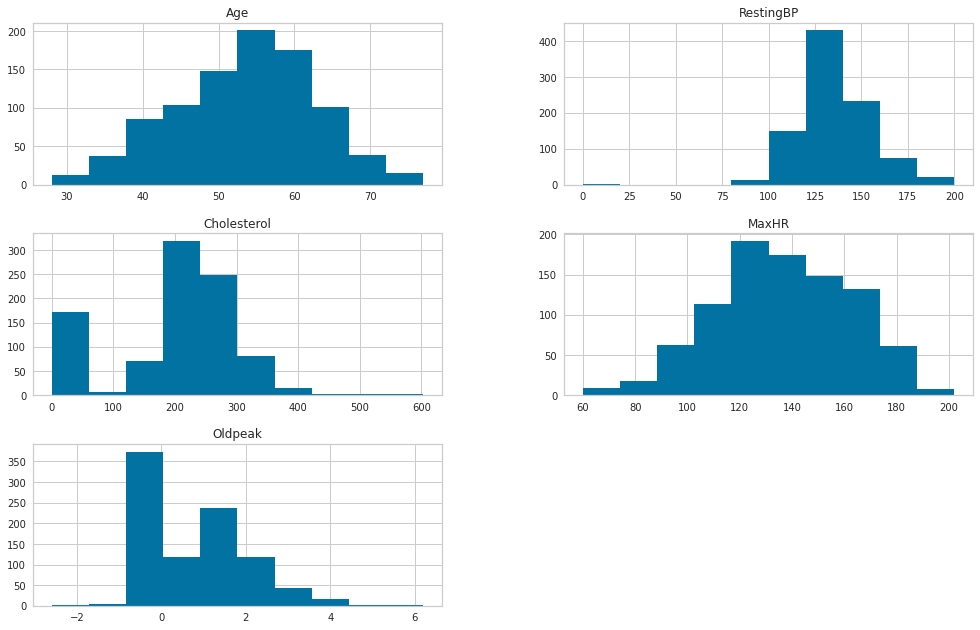

In [9]:
dataset[numerical_features].hist(figsize = (15, 10)) 

plt.show()

> #### As we can see Age and MaxHR have gaussian like distributions.

> #### RestingBP might have few outliers as the distribution is left skewed. We need to explore the Cholesterol feature since it has zeros.

> #### So we need to handle these distributions by performing transformations and make them closer to normal distribution inorder to improve the model performance.

> #### Let's plot histogram, qq-plot and boxplot to get a big picture of these variables

<AxesSubplot:>

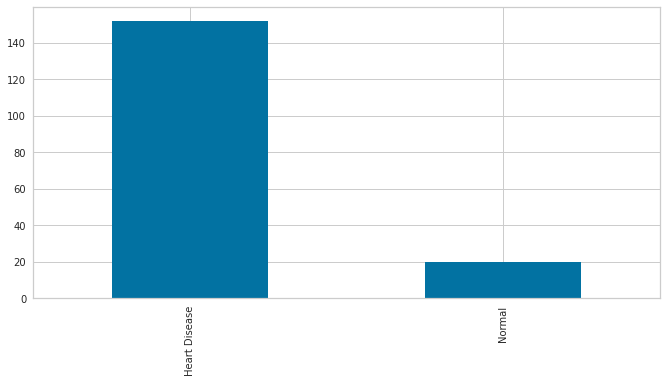

In [10]:
dataset[dataset['Cholesterol'] == 0]['HeartDisease'].value_counts().plot.bar(figsize = (10, 5))

> #### Very low levels of cholesterol maybe associated with an increase risk of Cancer and Hemorrhagic stroke

### Checking Outliers
<a id='outliers'/>

In [11]:
def check_outliers(df, variable):
    
    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

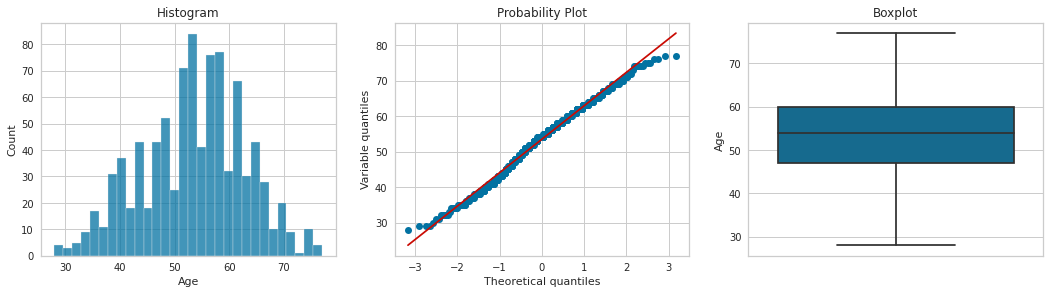

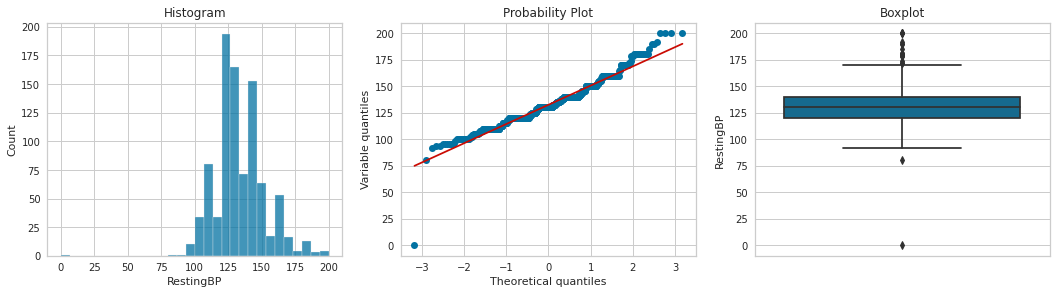

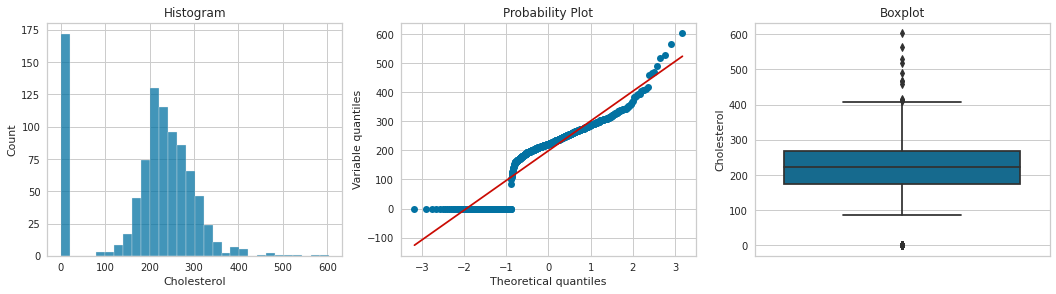

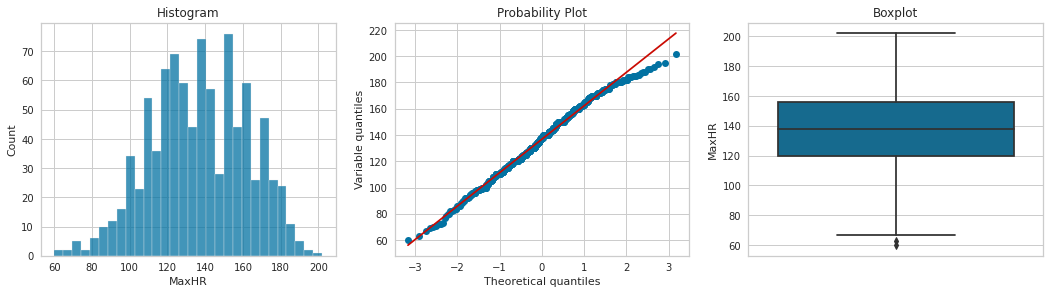

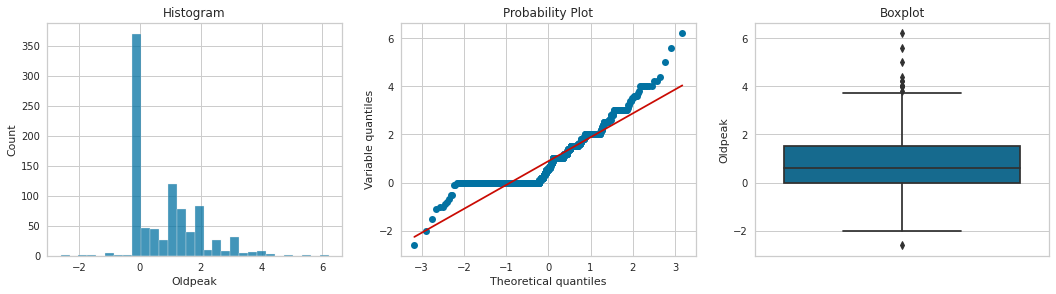

In [12]:
for feature in numerical_features:
    check_outliers(dataset, feature)

> #### We don't have any outliers for the feature Age and it is normally distributed.
> #### While the feature MaxHR have very less outliters which might not be affecting our model performance (We will check it while building the model by using trail and error method).

> #### Other features have outliers and are not normally distributed, so let's apply transformations to them and see we can improve those features or not

### Yeojohnson Transformation
<a id='yeo'/>

In [13]:
def apply_yeojohnson(df, numerical_features, return_temp_data = False):
    fig, ax = plt.subplots(1, len(numerical_features), figsize = (30, 5))
    
    temp_data = df.copy()

    i = 0
    for feature in numerical_features:

        fitted_data, _ = stats.yeojohnson(df[feature])
        sns.histplot(fitted_data, kde = True, ax = ax[i]).set_title(feature)
        i = i + 1
        
        if return_temp_data:
            temp_data[feature], _ = stats.yeojohnson(df[feature])
            
    
    if return_temp_data:
        return temp_data

    plt.show()

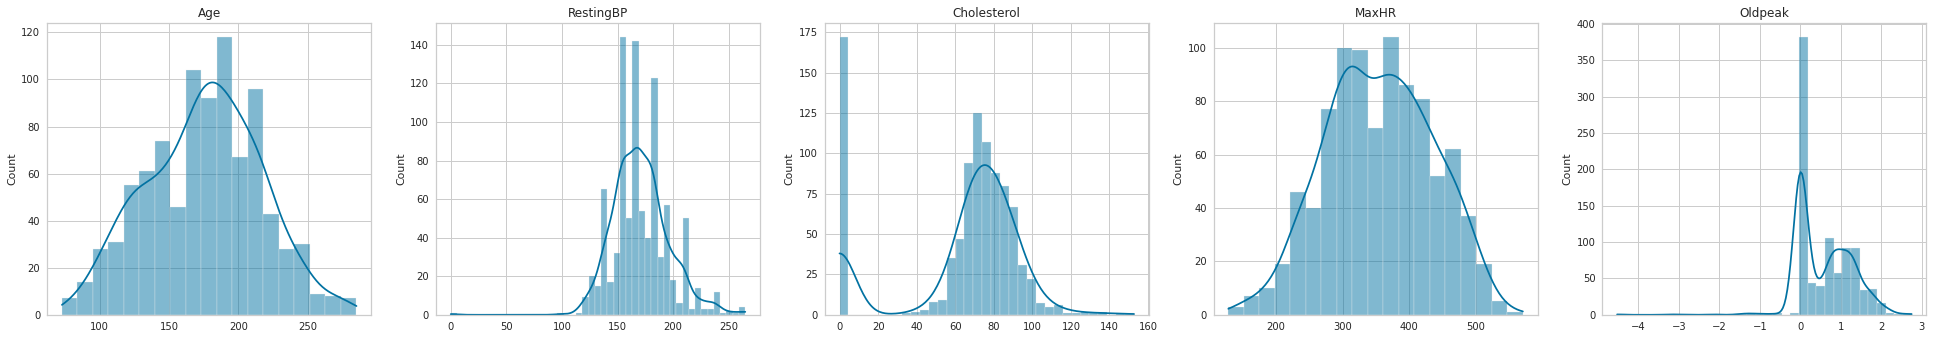

In [14]:
temp_data = apply_yeojohnson(dataset, numerical_features, return_temp_data = True)

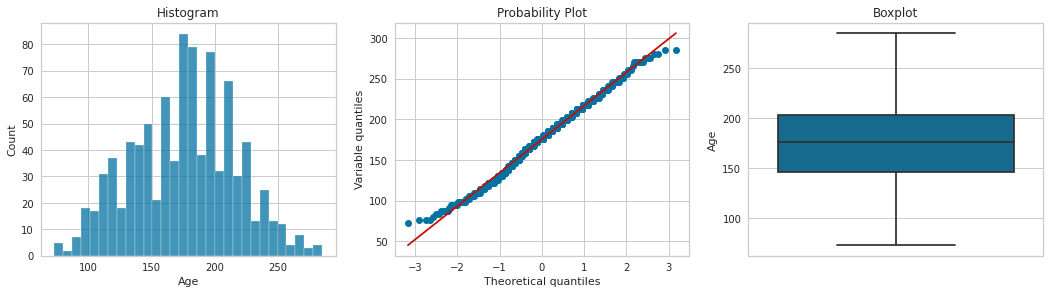

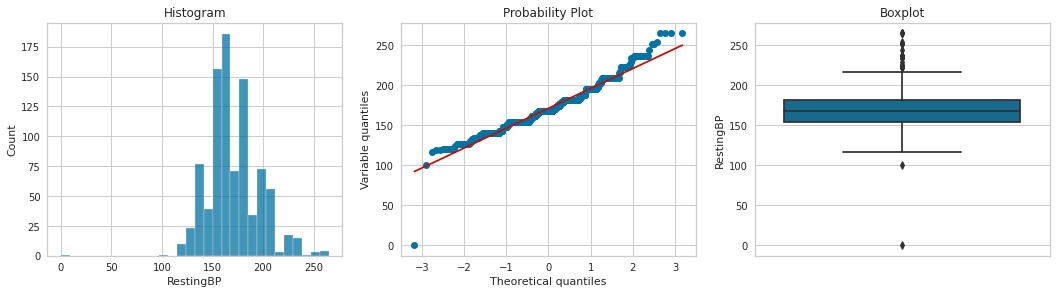

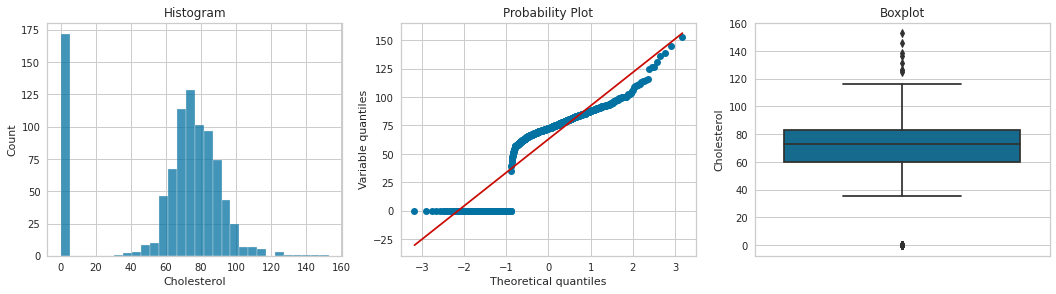

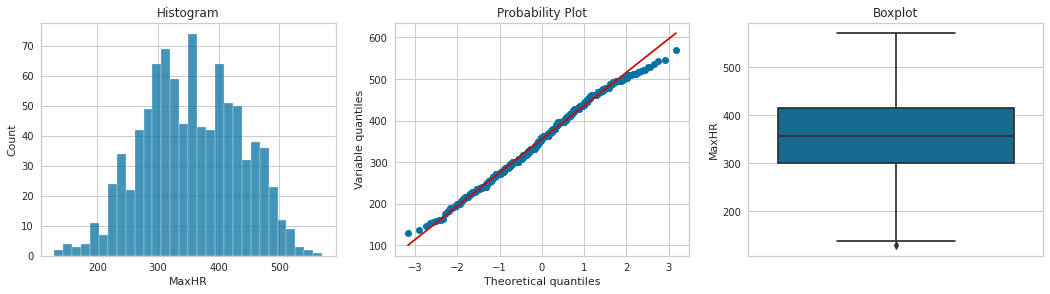

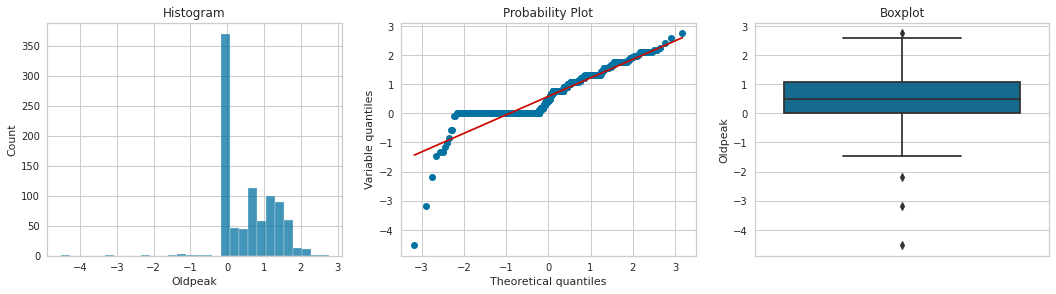

In [15]:
for feature in numerical_features:
    check_outliers(temp_data, feature)

> #### yeojohnson transformation masked few outliers in MaxHR 

In [16]:
to_yeo = ['Age', 'MaxHR']

### Square root Transformation
<a id='sqrt'/>

In [17]:
def apply_sqrt(df, numerical_features, return_temp_data = False):
    fig, ax = plt.subplots(1, len(numerical_features), figsize = (30, 5))
    
    temp_data = df.copy()

    i = 0
    for feature in numerical_features:
        
        temp_data[feature] = np.sqrt(df[feature])
        sns.histplot(temp_data[feature], kde = True, ax = ax[i]).set_title(feature)
        i = i + 1

        if return_temp_data:
            temp_data[feature] = np.sqrt(df[feature])
            
    
    if return_temp_data:
        return temp_data

    plt.show()

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

invalid value encountered in sqrt

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

invalid value encountered in sqrt



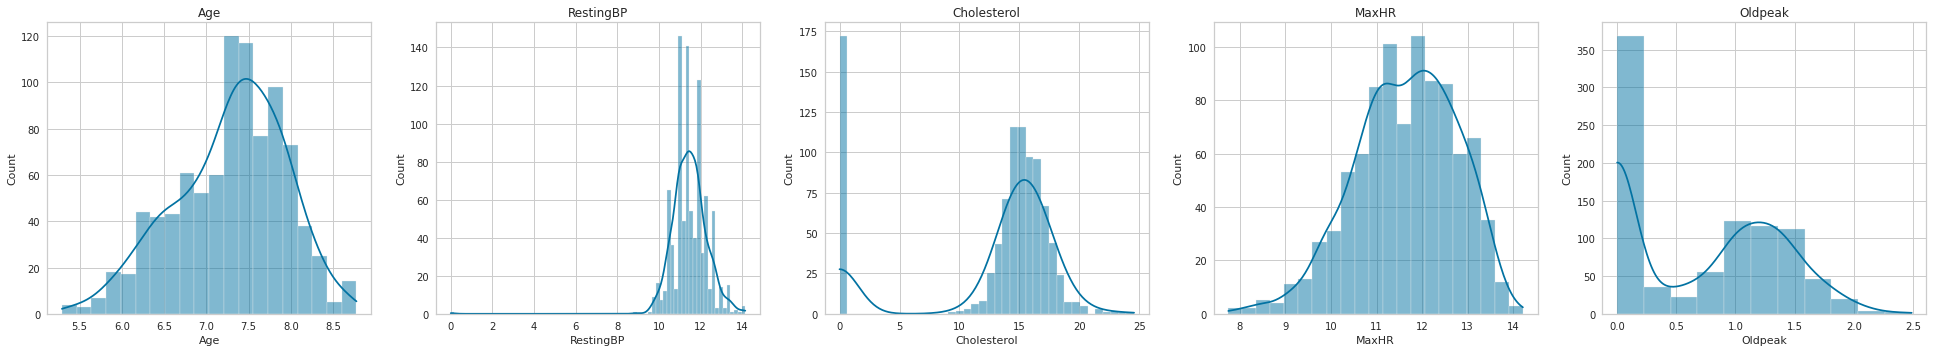

In [18]:
temp_data = apply_sqrt(dataset, numerical_features, return_temp_data = True)

> #### RuntimeWarning Message is showing due to negative values in Oldpeak

In [19]:
def apply_power_transformation(df, numerical_features, return_temp_data = False, power = 0.5):
    fig, ax = plt.subplots(1, len(numerical_features), figsize = (30, 5))
    
    temp_data = df.copy()

    i = 0
    for feature in numerical_features:
        
        temp_data[feature] = pow(df[feature], power)
        sns.histplot(temp_data[feature], kde = True, ax = ax[i]).set_title(feature)
        i = i + 1

        if return_temp_data:
            temp_data[feature] = pow(df[feature], power)
            
    
    if return_temp_data:
        return temp_data

    plt.show()

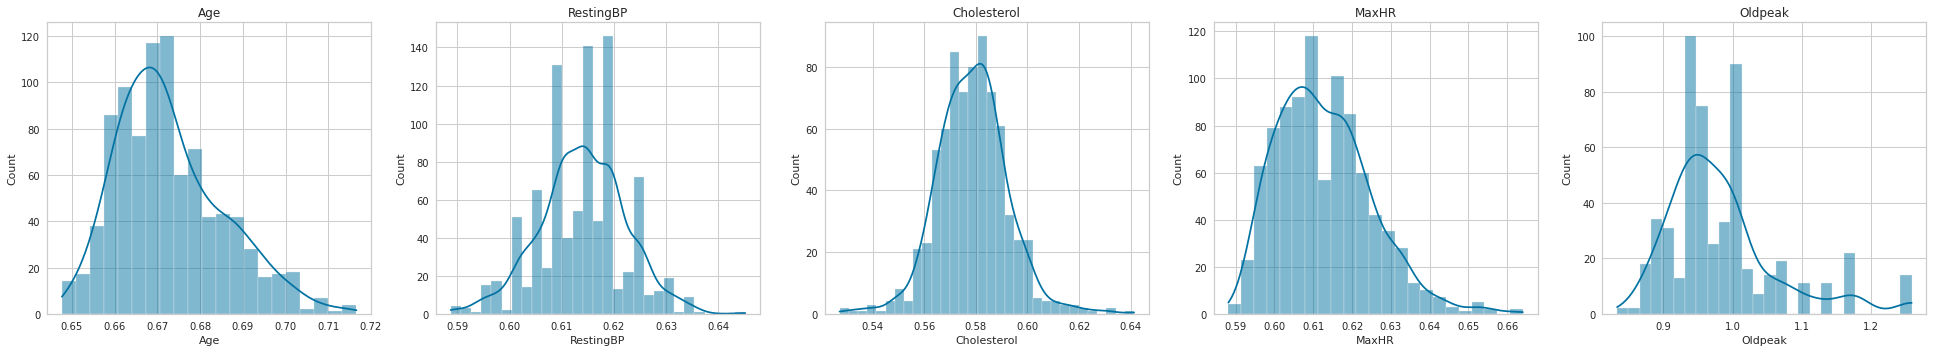

In [20]:
temp_data = apply_power_transformation(dataset, numerical_features, return_temp_data = True, power = -0.1)

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2536: RuntimeWarning:

invalid value encountered in subtract



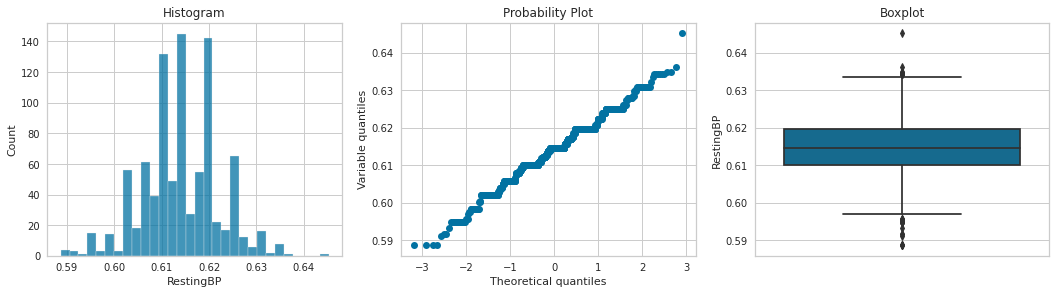

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2536: RuntimeWarning:

invalid value encountered in subtract



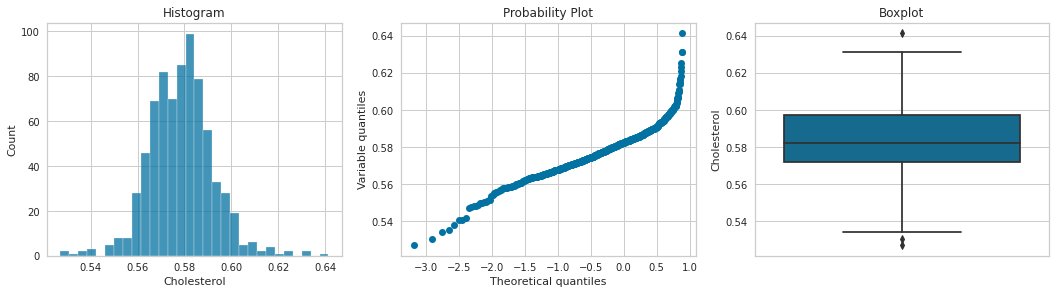

In [21]:
for feature in ['RestingBP', 'Cholesterol']:
    check_outliers(temp_data, feature)

In [22]:
to_pow_minus_0_1 = ['RestingBP', 'Cholesterol']

> #### We still have extreme values in the distribution. So we will perform a trail and error method by transformin this feature during model fitting.

### Correlation
<a id='corr'/>

In [23]:
px.imshow(dataset.corr(), text_auto = True, aspect = 'auto', labels = dict(x = 'Correlation between numerical features'))

## Categorical Features
<a id='cat_features'/>

In [24]:
def plot_bar(df, subplot_titles, feature, plot_title, ncols = 5, width = 1500, height = 500):
    
    fig = make_subplots(rows = 1, cols = ncols, subplot_titles = subplot_titles, x_title = 'Heart Disease', y_title = 'Count', shared_yaxes='all')

    col_inc = 1
    for subtype in subplot_titles:
        bar_dict = df[df[feature] == subtype]['HeartDisease'].value_counts().to_dict()
        fig.add_trace(go.Bar(x = list(bar_dict.keys()), y = list(bar_dict.values()), name = subtype), row = 1, col = col_inc)

        col_inc = col_inc + 1

    fig.update_layout(width = width, height = height, title = plot_title)

    fig.show()

### Number of categories present in each categorical feature
<a id='cat_num'/>

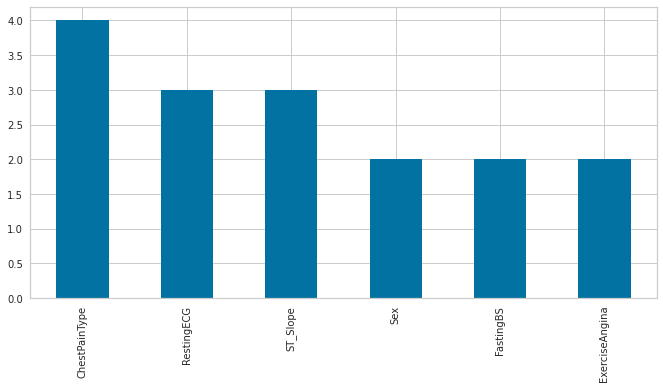

In [25]:
dataset[categorical_features].nunique().sort_values(ascending = False).plot.bar(figsize = (10, 5))

plt.show()

### Encoding categorical features
<a id='cat_encode'/>

In [26]:
sex_dict = {'M': 'Male', 'F': 'Female'}
chest_pain_dict = {'TA': 'Typical Angina', 'ATA': 'Atypical Angina', 'NAP': 'Non-Anginal Pain', 'ASY': 'Asymptomatic'}
exercise_dict = {'Y': 'Yes', 'N': 'No'}
st_slop_dict = {'Up': 'Upsloping', 'Flat': 'Flat', 'Down': 'Downsloping'}

encode_features = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']
encode_dicts = [sex_dict, chest_pain_dict, exercise_dict, st_slop_dict]

for encode_feature, encode_dict in zip(encode_features, encode_dicts):
    dataset[encode_feature] = dataset[encode_feature].map(encode_dict)

In [27]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,Male,Atypical Angina,140,289,0,Normal,172,No,0.0,Upsloping,Normal
1,49,Female,Non-Anginal Pain,160,180,0,Normal,156,No,1.0,Flat,Heart Disease
2,37,Male,Atypical Angina,130,283,0,ST,98,No,0.0,Upsloping,Normal
3,48,Female,Asymptomatic,138,214,0,Normal,108,Yes,1.5,Flat,Heart Disease
4,54,Male,Non-Anginal Pain,150,195,0,Normal,122,No,0.0,Upsloping,Normal


### Sex
<a id='sex'/>

In [28]:
data = dataset['Sex'].value_counts(ascending = False)

fig = px.bar(data, x = data.index, y = data.values)
fig.update_layout(width = 800, height = 400, xaxis_title = 'Gender', yaxis_title = 'Count', font = dict(family = 'Cavolini', size = 16, color = 'black'))

fig.show()

> #### We have 725 males and 193 females, i.e., 79% of our data consists of males and 21% of our data consists of females.

> #### We can test the fairness of the model using this feature (Sensitive Feature)
> > #### i.e., whether our model is predicting correctly irrespective of the gender bias.

In [29]:
plot_bar(dataset, subplot_titles = list(dataset['Sex'].value_counts(ascending = False).index), feature = 'Sex', ncols = 2, plot_title = 'Different types of genders', width = 1000, height = 600)

> #### About 63% of males were diagnosed with heart disease and remaining 37% didn't. 
> #### Only 26% of females were diagnosed with heart disease and remaning 74% didn't.

### ChestPainType
<a id='chest_pain'/>

In [30]:
plot_bar(dataset, subplot_titles = list(dataset['ChestPainType'].value_counts(ascending = False).index), ncols = 4, feature = 'ChestPainType', plot_title = 'Different types of chest pains')

> #### It is clearly evident that, most of the patients who experienced asymptomatic chest pain are diagnosed with heart attack while the least being typical angina.
> > #### About 79% of patients who experienced asymptomatic chest pain gor heart disease while the remaining 21% didn't get one.

### RestingECG
<a id='ecg'/>

In [31]:
plot_bar(dataset, subplot_titles = list(dataset['RestingECG'].value_counts(ascending = False).index), ncols = 3, feature = 'RestingECG', plot_title = 'Different types RestingECG')

> #### RestingECG is a test that measures the electrical activity of the heart. '
> > #### LVH, Left Ventricular Hypertrophy, is a thickening of the wall of the heart's main pumping chamber may result in elevation of pressure within the heart and sometimes poor pumping action.

## ST_Slope
<a id='st'/>

In [32]:
plot_bar(dataset, subplot_titles = list(dataset['ST_Slope'].value_counts(ascending = False).index), ncols = 3, feature = 'ST_Slope', plot_title = 'Different types ST_Slope')

> #### An ST-elevation myocardial infarction (STEMI) is a type of heart attack that mainly affects your heart's lower chambers.
> > #### They are named for how they change the appearance of your heart's electrical activity on a certain type of diagnostic test.

> #### When the ST Slope is Flat, there are more cases of a heart disease, about 83%.
> #### When the ST Slope if Upsloping, about 80% of the times, according to our dataset we can say that the patient won't getting a Heart Disease.

### FastingBS
<a id='fasting'>

In [33]:
plot_bar(dataset, subplot_titles = list(dataset['FastingBS'].value_counts(ascending = False).index), ncols = 2, feature = 'FastingBS', plot_title = 'Different types of FastingBS', width = 800, height = 500)

> #### According to our dataset, when the fasting blood sugar is below 121 mg/dl, about 48% of the paitents were diagnosed with a heart disease.
> > #### When fasting blood sugar is greater 120 mg/dl, about 79% of the patients were diagnosed with a heart disease.

### ExerciseAngina
<a id='angina'>

In [34]:
plot_bar(dataset, subplot_titles = list(dataset['ExerciseAngina'].value_counts(ascending = False).index), ncols = 2, feature = 'ExerciseAngina', plot_title = 'Different types of ExerciseAngina', width = 800, height = 500)

> #### Exercise Angina is a type of chest pain caused by reduced blood flow to the heart.
> > #### When exercise angina is Yes, our data shows, about 85% of the patients were diagnosed with a heart disease. 

> > #### In the absence of angine, only 35% of the patients were diagnosed with a heart disease.

### Rare Labels
<a id='rare'/>

> #### It is important to handle the rare labels in our dataset because of the following reason:
> #### Rare labels can cause the dimension problem when we are trying to score new data. When we split our dataset into train and test split, we might miss some rare values in train set and our model will not recognise the new values in test set and raises the error. In order to solve this, we need to handle rare values by combining all the rare values into one category.

In [35]:
def analyse_rare_labels(dataset, feature, rare_precentage):
    dataset = dataset.copy()
    
    # Detemining the percentage of observation per category.
    temp_data = dataset.groupby(feature)['HeartDisease'].count() / len(dataset) 
    
    # If the values of the category are less than the rare percentage (given by the user) then, we will return that category along with its percentage in total dataset.
    return temp_data[temp_data < rare_precentage]

In [36]:
for feature in categorical_features:
    print(feature, '--->', analyse_rare_labels(dataset, feature, 0.05))

Sex ---> Series([], Name: HeartDisease, dtype: float64)
ChestPainType ---> Series([], Name: HeartDisease, dtype: float64)
FastingBS ---> Series([], Name: HeartDisease, dtype: float64)
RestingECG ---> Series([], Name: HeartDisease, dtype: float64)
ExerciseAngina ---> Series([], Name: HeartDisease, dtype: float64)
ST_Slope ---> Series([], Name: HeartDisease, dtype: float64)


> #### We don't have any rare labels in our dataset

# Transforming the dataset
<a id='transforming'/>

### Train-Test Split
<a id='split'/>

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop(['HeartDisease'], axis = 1),
    dataset['HeartDisease'],
    test_size = 0.3,
    random_state = 42
)

## Numerical Features
<a id='transform_numerical'/>

In [38]:
yeojohnson = YeoJohnsonTransformer(variables = to_yeo)
yeojohnson.fit(X_train, y_train)

X_train = yeojohnson.transform(X_train)
X_test = yeojohnson.transform(X_test)

> #### Based on the above analysis, I decided to transform the selected features using YeoJohnson Transformation

In [39]:
# powerTransform = PowerTransformer(variables = to_pow_minus_0_1, exp = -0.1)
# powerTransform.fit(X_train, y_train)

# X_train = powerTransform.transform(X_train)
# X_test = powerTransform.transform(X_test)

## Categorical Features
<a id='transform_categorical'/>

In [40]:
ohe_encoding = OneHotEncoder(variables = categorical_features, drop_last = True)
ohe_encoding.fit(X_train, y_train)

X_train = ohe_encoding.transform(X_train)
X_test = ohe_encoding.transform(X_test)

> #### One hot encoding the categorical features

## Feature Scaling
<a id='scaling'/>

In [41]:
scaler = StandardScaler()
scaler.fit(X_train, y_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = list(X_train.columns))
X_test = pd.DataFrame(scaler.transform(X_test), columns = list(X_test.columns))

## Feature Selection
<a id='feature_selection'/>

In [42]:
# from sklearn.linear_model import LogisticRegression
# from feature_engine.selection import RecursiveFeatureAddition

# logit_classifier = LogisticRegression(max_iter = 2000)

# rfa = RecursiveFeatureAddition(variables = None, estimator = logit_classifier,
#                                scoring = 'accuracy', threshold = 0.001, cv = 5)

# rfa.fit(X_train, y_train)

# # Selecting important features
# X_train = rfa.transform(X_train)
# X_test = rfa.transform(X_test)

# rfa.feature_importances_.plot.bar(figsize=(20,6))
# plt.xlabel('Important Features')
# plt.ylabel('Importance')
# plt.show()


from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

target_dict_ = {'Heart Disease': 1, 'Normal': 0}

sel_ = SelectFromModel(Lasso(alpha=0.01, random_state=101))
sel_.fit(X_train, y_train.map(target_dict_))

selected_feat = X_train.columns[(sel_.get_support())]
X_train = X_train[selected_feat]
X_test = X_test[selected_feat]

# Model Building
<a id='models'/>

### Decision Tree Classfier with hyperparameter tunning
<a id='tree'/>

In [43]:
# decision_tree_classifier = DecisionTreeClassifier()

# parameters = {
#     'max_depth': range(2, 20, 1),
#     'min_samples_split': range(2, 10, 1),
#     'min_samples_leaf': range(2, 10, 1),
#     'max_features': ['sqrt', 'log2'],
#     'random_state': range(0, 200, 40)
# }

# decision_tree_grid_search = GridSearchCV(
#     estimator = decision_tree_classifier,
#     param_grid = parameters,
#     scoring = 'accuracy',
#     n_jobs = 10,
#     cv = 10,
#     verbose=True
# )

# decision_tree_grid_search.fit(X_train, y_train)

# print(decision_tree_grid_search.best_estimator_) # Lasso -> DecisionTreeClassifier(max_depth = 5, max_features = 'sqrt', min_samples_leaf = 3,random_state = 40)

> #### The above code runs for some decent amount of time, so I saved the output inorder to save the time.

### Classification Report
<a id='report'>

In [44]:
target_decode_dict_ = {'Heart Disease': 1, 'Normal': 0}

y_train = y_train.map(target_decode_dict_)
y_test = y_test.map(target_decode_dict_)

decision_tree_grid_search = DecisionTreeClassifier(max_depth = 5, max_features = 'sqrt', min_samples_leaf = 3, random_state = 40)
decision_tree_grid_search.fit(X_train, y_train)

y_train_pred = decision_tree_grid_search.predict(X_train)
y_test_pred = decision_tree_grid_search.predict(X_test)

print("Train Score: ")
print(classification_report(y_train, y_train_pred))
print()
print('Test Score: ')
print(classification_report(y_test, y_test_pred))

Train Score: 
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       298
           1       0.86      0.91      0.88       344

    accuracy                           0.87       642
   macro avg       0.87      0.87      0.87       642
weighted avg       0.87      0.87      0.87       642


Test Score: 
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       112
           1       0.87      0.85      0.86       164

    accuracy                           0.84       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



> #### We got pretty good results here for our first try!!!
> > #### As we can see, our model's accuracy on train set is 87% and on test set is 84% along with the recall greater than 80% for both the classes on test set.

### Confusion Matrix
<a id='matrix'>

In [45]:
print("Train Score: ")
print(confusion_matrix(y_train, y_train_pred))
print()
print("Test Score: ")
print(confusion_matrix(y_test, y_test_pred))

Train Score: 
[[248  50]
 [ 32 312]]

Test Score: 
[[ 92  20]
 [ 25 139]]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



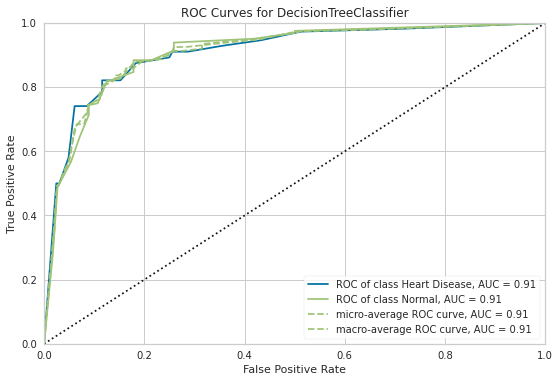

In [46]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(decision_tree_grid_search, classes = ['Heart Disease', 'Normal'])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

plt.show()

<div style = 'text-align: center;'>
    <span style="font-family:cursive; font-size: 28px">💖 Thank you 💖</span>
</div>